In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load dataset
df = pd.read_csv("car_evaluation.csv")

# Rename columns for clarity
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# Encode categorical data
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Split features and target
X = df.drop('class', axis=1)
y = df['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy: 0.9624277456647399


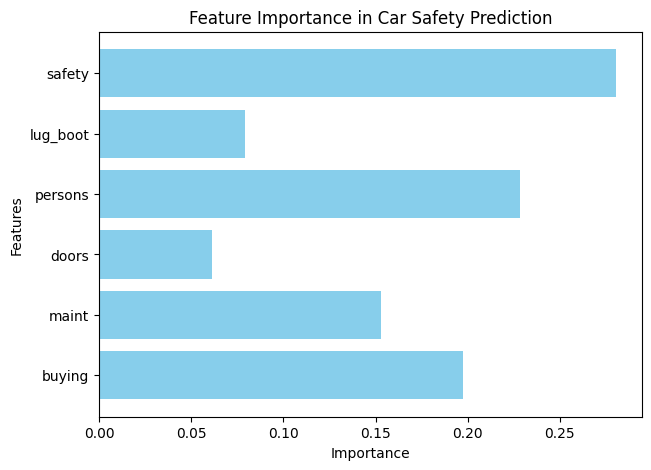

In [3]:
# Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediction and accuracy
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# --- Feature Importance Visualization ---
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(7,5))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Car Safety Prediction")
plt.show()

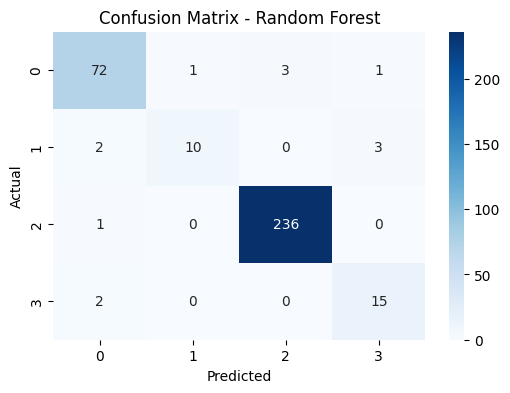

In [4]:
# --- Confusion Matrix Heatmap ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()
